### Analysis 1: Social Interaction and Wellness

`'CONNECTION_social_time_family_p7d'`: In the PAST WEEK (or Past 7 days in certain cohorts), how many hours in total did you spend socializing with others from the following groups? - Family Members
`'CONNECTION_social_time_friends_p7d'`: In the PAST WEEK, how many hours in total did you spend socializing with others from the following groups? - Friends
`'CONNECTION_social_time_coworkers_and_classmates_p7d'`: In the PAST WEEK, how many hours in total did you spend socializing with others from the following groups? - Coworkers or Classmates
`'CONNECTION_social_time_coworkers_p7d'`: In the PAST WEEK, how many hours in total did you spend socializing with others from the following groups? - Coworkers
`'CONNECTION_social_time_classmates_p7d'`: In the PAST WEEK, how many hours in total did you spend socializing with others from the following groups? - Classmates
`'CONNECTION_social_time_neighbours_p7d'`: In the PAST WEEK, how many hours in total did you spend socializing with others from the following groups? - Neighbours

`'CONNECTION_preference_time_family'`: Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Family Members
`'CONNECTION_preference_time_friends'`: Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Friends
`'CONNECTION_preference_time_coworkers_classmates'`: Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Coworkers or Classmates
`'CONNECTION_preference_time_coworkers'`: Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Coworkers
`'CONNECTION_preference_time_classmates'`: Ideally, how many hours per week would you like to spend socializing with each of the following groups? - Classmates
`'CONNECTION_preference_time_neighbours'`: How much time per week would you like to spend socializing with others from the following groups? - Neighbours

#### Wellness

`'WELLNESS_self_rated_mental_health'`: (Add description)
`'WELLNESS_self_rated_physical_health'`: (Add description)

##### Note: For preference time, some cohorts have "How much time per week would you like to spend socializing with others from the following groups?" as the description. We can assume that they are referring to hours.

Categorical Social Time...

`'CONNECTION_social_time_family_p7d_grouped'`,
`'CONNECTION_social_time_friends_p7d_grouped'`,
`'CONNECTION_social_time_coworkers_and_classmates_p7d_grouped'`,
`'CONNECTION_social_time_neighbours_p7d_grouped'`,
`'CONNECTION_preference_time_family_grouped'`,
`'CONNECTION_preference_time_friends_grouped'`,
`'CONNECTION_preference_time_coworkers_classmates_grouped'`,
`'CONNECTION_preference_time_neighbours_grouped'`

...which we can turn to "Dissatisfaction" binary for each...

`'CONNECTION_social_time_family_p7d_grouped'` == `'CONNECTION_preference_time_family_grouped'`

Categorical WELLNESS (already categories, so no manipulation required):

`'WELLNESS_self_rated_mental_health'`
`'WELLNESS_self_rated_physical_health'`

Getting the number of data points available for each column: 

In [3]:
import pandas as pd

# Assuming your DataFrame is named df
columns = [
    'CONNECTION_social_time_family_p7d_grouped',
    'CONNECTION_social_time_friends_p7d_grouped',
    'CONNECTION_social_time_coworkers_and_classmates_p7d_grouped',
    'CONNECTION_social_time_neighbours_p7d_grouped',
    'CONNECTION_preference_time_family_grouped',
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_neighbours_grouped'
]

import pandas as pd

df = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

# Get the count of non-null values for each column
data_counts = df[columns].count()

print(data_counts)


CONNECTION_social_time_family_p7d_grouped                      9101
CONNECTION_social_time_friends_p7d_grouped                     9087
CONNECTION_social_time_coworkers_and_classmates_p7d_grouped    5668
CONNECTION_social_time_neighbours_p7d_grouped                  9009
CONNECTION_preference_time_family_grouped                      6717
CONNECTION_preference_time_friends_grouped                     6715
CONNECTION_preference_time_coworkers_classmates_grouped        5477
CONNECTION_preference_time_neighbours_grouped                  6646
dtype: int64


Getting the value counts of unique variables for each column:

In [4]:
import pandas as pd

# Assuming your DataFrame is named df
columns = [
    'CONNECTION_social_time_family_p7d_grouped',
    'CONNECTION_social_time_friends_p7d_grouped',
    'CONNECTION_social_time_coworkers_and_classmates_p7d_grouped',
    'CONNECTION_social_time_neighbours_p7d_grouped',
    'CONNECTION_preference_time_family_grouped',
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_neighbours_grouped'
]

# Iterate over the columns and get the value counts for each
for column in columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for CONNECTION_social_time_family_p7d_grouped:
CONNECTION_social_time_family_p7d_grouped
5 or more hours              3813
1 to 4 hours                 2480
Less than 1 hour             1538
No time                      1235
Presented but no response      35
Name: count, dtype: int64


Value counts for CONNECTION_social_time_friends_p7d_grouped:
CONNECTION_social_time_friends_p7d_grouped
1 to 4 hours                 3016
5 or more hours              2708
Less than 1 hour             1835
No time                      1490
Presented but no response      38
Name: count, dtype: int64


Value counts for CONNECTION_social_time_coworkers_and_classmates_p7d_grouped:
CONNECTION_social_time_coworkers_and_classmates_p7d_grouped
No time                      1748
1 to 4 hours                 1323
Less than 1 hour             1282
5 or more hours              1257
Presented but no response      58
Name: count, dtype: int64


Value counts for CONNECTION_social_time_neighbours_p7d_grouped

Creating new dissatisfaction columns from the data set:

`'dissatisfaction_family_time'`,
`'dissatisfaction_friends_time'`,
`'dissatisfaction_coworkers_classmates_time'`,
`'dissatisfaction_neighbours_time'`

In [5]:
# Creating new columns for dissatisfaction
df['dissatisfaction_family_time'] = df['CONNECTION_social_time_family_p7d_grouped'] != df['CONNECTION_preference_time_family_grouped']
df['dissatisfaction_friends_time'] = df['CONNECTION_social_time_friends_p7d_grouped'] != df['CONNECTION_preference_time_friends_grouped']
df['dissatisfaction_coworkers_classmates_time'] = df['CONNECTION_social_time_coworkers_and_classmates_p7d_grouped'] != df['CONNECTION_preference_time_coworkers_classmates_grouped']
df['dissatisfaction_neighbours_time'] = df['CONNECTION_social_time_neighbours_p7d_grouped'] != df['CONNECTION_preference_time_neighbours_grouped']

# Displaying the DataFrame with the new columns (optional)
print(df['dissatisfaction_family_time'])

0        False
1         True
2        False
3         True
4        False
         ...  
11426     True
11427     True
11428    False
11429    False
11430    False
Name: dissatisfaction_family_time, Length: 11431, dtype: bool


Number of available data points from each wellness column:

In [6]:
# Variables to analyze
wellness_columns = [
    'WELLNESS_self_rated_mental_health',
    'WELLNESS_self_rated_physical_health'
]

# Analyze the number of available data points and unique values
for column in wellness_columns:
    print(f"Analysis for {column}:")
    print(f"Number of available data points: {df[column].count()}")
    print("Unique values and their counts:")
    print(df[column].value_counts())
    print("\n")

Analysis for WELLNESS_self_rated_mental_health:
Number of available data points: 9331
Unique values and their counts:
WELLNESS_self_rated_mental_health
Good                         2785
Very good                    2442
Fair                         2048
Excellent                    1057
Poor                          931
Presented but no response      68
Name: count, dtype: int64


Analysis for WELLNESS_self_rated_physical_health:
Number of available data points: 9330
Unique values and their counts:
WELLNESS_self_rated_physical_health
Good                         3022
Very good                    2625
Fair                         1864
Excellent                    1027
Poor                          710
Presented but no response      82
Name: count, dtype: int64




### Chi Squared Test of Independence:

Null hypothesis: An individuals' wellness self-rating and social time dissatisfaction are independent. There is no relationship between wellness ratings and dissatisfaction levels.

Alternate Hypothesis: The two variables are not independent. There is a relationship between wellness ratings and dissatisfaction levels.

##### Step 1: Contingency Tables (Export for slides)

In [10]:
dissatisfaction_columns = [
    'dissatisfaction_family_time',
    'dissatisfaction_friends_time',
    'dissatisfaction_coworkers_classmates_time',
    'dissatisfaction_neighbours_time'
]

# Loop through the dissatisfaction and wellness variables
for wellness in wellness_columns:
    for dissatisfaction in dissatisfaction_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(df[wellness], df[dissatisfaction])
        
        # Print the contingency table for review
        print(f"\nContingency table for {wellness} vs {dissatisfaction}:")
        print(contingency_table)
        
        # Save the table to a CSV file (uncomment to export)
        # file_name = f"contingency_table_{wellness}_vs_{dissatisfaction}.csv"
        # contingency_table.to_csv(file_name)
        # print(f"Contingency table saved as '{file_name}'.")


Contingency table for WELLNESS_self_rated_mental_health vs dissatisfaction_family_time:
dissatisfaction_family_time        False  True 
WELLNESS_self_rated_mental_health              
Excellent                            536    521
Fair                                 726   1322
Good                                1224   1561
Poor                                 277    654
Presented But No Response             19     49
Very Good                           1234   1208

Contingency table for WELLNESS_self_rated_mental_health vs dissatisfaction_friends_time:
dissatisfaction_friends_time       False  True 
WELLNESS_self_rated_mental_health              
Excellent                            467    590
Fair                                 593   1455
Good                                1046   1739
Poor                                 221    710
Presented But No Response             18     50
Very Good                           1083   1359

Contingency table for WELLNESS_self_rated_mental_hea

##### Step 2: Chi-Squared Test Results

In [12]:
from scipy.stats import chi2_contingency

# Ensure p-values are displayed with scientific notation
chi_squared_results_scientific = []

for wellness in wellness_columns:
    for dissatisfaction in dissatisfaction_columns:
        contingency_table = pd.crosstab(df[wellness], df[dissatisfaction])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        chi_squared_results_scientific.append({
            "Wellness Variable": wellness,
            "Dissatisfaction Variable": dissatisfaction,
            "Chi-Squared Statistic": round(chi2, 4),
            "P-value": f"{p:.10e}",  # Scientific notation for p-value
            "Degrees of Freedom": dof
        })

chi_squared_df_scientific = pd.DataFrame(chi_squared_results_scientific)

# Display the table
print(chi_squared_df_scientific)


                     Wellness Variable  \
0    WELLNESS_self_rated_mental_health   
1    WELLNESS_self_rated_mental_health   
2    WELLNESS_self_rated_mental_health   
3    WELLNESS_self_rated_mental_health   
4  WELLNESS_self_rated_physical_health   
5  WELLNESS_self_rated_physical_health   
6  WELLNESS_self_rated_physical_health   
7  WELLNESS_self_rated_physical_health   

                    Dissatisfaction Variable  Chi-Squared Statistic  \
0                dissatisfaction_family_time               203.7219   
1               dissatisfaction_friends_time               211.0310   
2  dissatisfaction_coworkers_classmates_time               225.1026   
3            dissatisfaction_neighbours_time               142.0843   
4                dissatisfaction_family_time               231.1604   
5               dissatisfaction_friends_time               231.0538   
6  dissatisfaction_coworkers_classmates_time               242.6084   
7            dissatisfaction_neighbours_time         

Chi-Squared Test Result Interpretation:-

P-Values:
- The p-values are EXTREMELY small ($p < 10^{-28}$ for most tests, indicating very strong evidence against the null hypothesis.
- This means that there is a significant relationship between wellness ratings and dissatisfaction levels across all social categories.

Chi-Squared Statistic:
- Larger Chi-Squared values indicate a stronger deviation from independence (null hypothesis).
- The relationship between physical health and dissatisfaction with coworkers/classmates shows the strongest correlation ($X^2 = 242.6084$).
- The relationship between mental health and dissatisfaction with neighbours shows the weakest correlation, though still highly significant ($X^2 = 142.0843$)

Summary: 
The analysis reveals a strong and statistically significant association between self-rated health (both mental and physical) and dissatisfaction across all social time categories (family, friends, coworkers/classmates, and neighbors). Individuals with poorer health ratings are consistently more likely to report dissatisfaction, particularly in their professional or academic social interactions, as evidenced by the strongest associations observed in dissatisfaction with coworkers and classmates.

Creating bar charts. Combining the charts into 2 charts:-

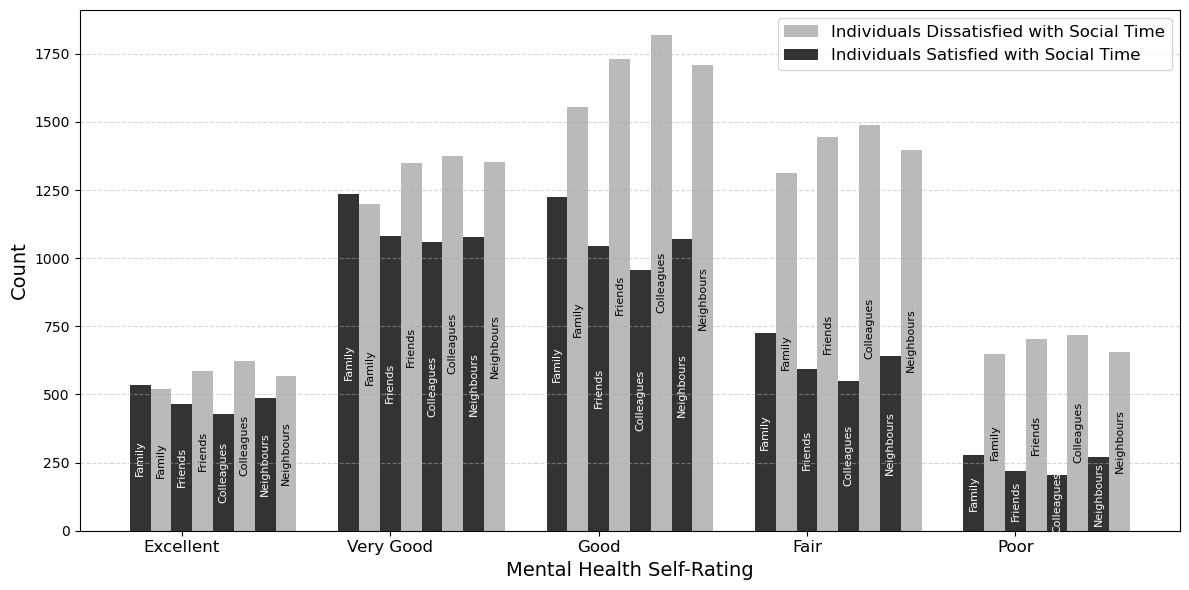

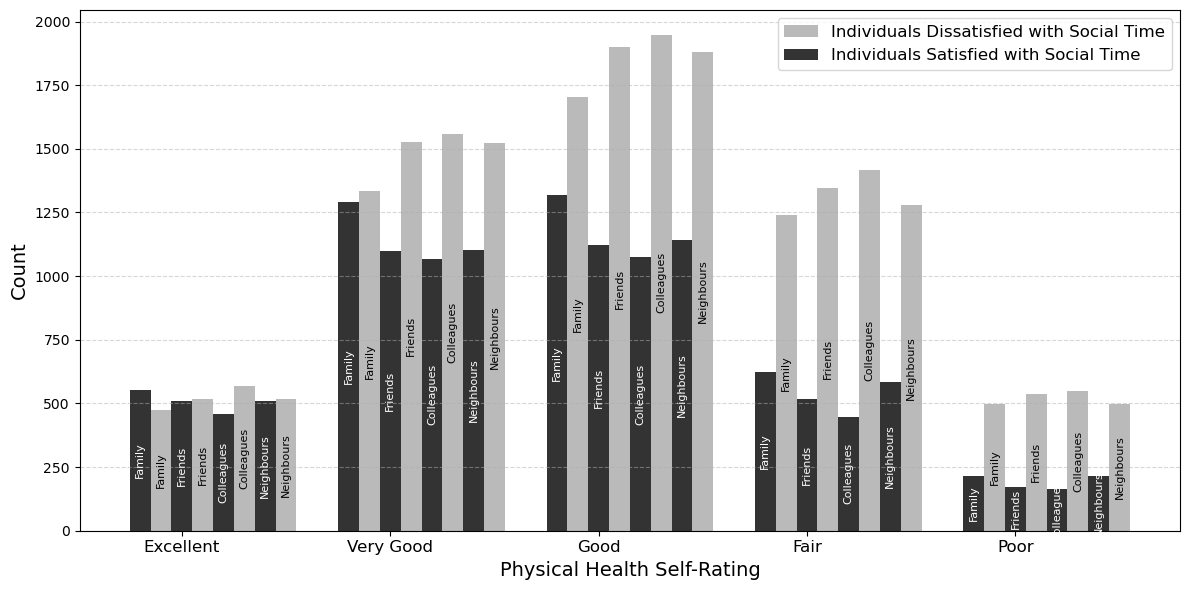

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Define black and gray colors for contrast
satisfied_color = '#333333'  # Black for Satisfied
dissatisfied_color = '#b3b3b3'  # Gray for Dissatisfied

for wellness in wellness_columns:
    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.2  # Narrower bars for clarity
    x_positions = range(len(category_order))  # Positions for "Excellent", "Very Good", etc.

    for i, dissatisfaction in enumerate(dissatisfaction_columns):
        crosstab = pd.crosstab(filtered_df[wellness], filtered_df[dissatisfaction])
        crosstab.columns = ['Satisfied', 'Dissatisfied']

        # Reindex crosstab to ensure alignment with category_order
        crosstab = crosstab.reindex(category_order, fill_value=0)

        # Calculate bar positions
        satisfied_positions = [x + i * bar_width for x in x_positions]
        dissatisfied_positions = [x + i * bar_width + bar_width / 2 for x in x_positions]

        # Plot Satisfied bars
        bars_satisfied = ax.bar(
            satisfied_positions,
            crosstab['Satisfied'],
            width=bar_width / 2,
            color=satisfied_color,
            label='Individuals Satisfied with Social Time' if i == 0 else "",
        )

        # Plot Dissatisfied bars
        bars_dissatisfied = ax.bar(
            dissatisfied_positions,
            crosstab['Dissatisfied'],
            width=bar_width / 2,
            color=dissatisfied_color,
            alpha=0.9,
            label='Individuals Dissatisfied with Social Time' if i == 0 else "",
        )

        # Add vertical labels ON the bars for Satisfied
        for bar, category in zip(bars_satisfied, crosstab.index):
            label = (
                "Colleagues" if dissatisfaction == "dissatisfaction_coworkers_classmates_time"
                else dissatisfaction.split('_')[1].capitalize()  # Simplified category name
            )
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() / 2,  # Centered vertically on the bar
                label,
                ha='center',
                va='center',
                fontsize=8,
                rotation=90,  # Rotate the text vertically
                color='white' if satisfied_color == '#333333' else 'black',  # Ensure good contrast
            )

        # Add vertical labels ON the bars for Dissatisfied
        for bar, category in zip(bars_dissatisfied, crosstab.index):
            label = (
                "Colleagues" if dissatisfaction == "dissatisfaction_coworkers_classmates_time"
                else dissatisfaction.split('_')[1].capitalize()  # Simplified category name
            )
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() / 2,  # Centered vertically on the bar
                label,
                ha='center',
                va='center',
                fontsize=8,
                rotation=90,  # Rotate the text vertically
                color='black',  # Black text for gray bars
            )

    # Create custom handles for the reordered legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles=[handles[1], handles[0]],  # Reorder: Dissatisfied (gray) first, Satisfied (black) second
        labels=[labels[1], labels[0]],
        loc='upper right',
        fontsize=12,
    )

    # Customize labels and grid
    ax.set_xlabel('Mental Health Self-Rating' if 'mental_health' in wellness.lower() else 'Physical Health Self-Rating', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_xticks([x + bar_width for x in x_positions])
    ax.set_xticklabels(category_order, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


##### Step 3: Logistic Regression (to see if poor health is associated with dissatisfaction.)

Null Hypothesis: The coefficients for all predictors are equal to zero. That is, mental and physical health ratings do not significantly influence dissatisfaction.

Alternate Hypothesis: At least one coefficient is not zero.
That is, mental and/or physical health ratings significantly influence dissatisfaction.

In [41]:
dissatisfaction_columns = [
    'dissatisfaction_family_time',
    'dissatisfaction_friends_time',
    'dissatisfaction_coworkers_classmates_time',
    'dissatisfaction_neighbours_time'
]

wellness_columns = [
    'WELLNESS_self_rated_mental_health',
    'WELLNESS_self_rated_physical_health'
]

# Map health categories to ordinal values for logistic regression
df['Mental_Health_Ordinal'] = df['WELLNESS_self_rated_mental_health'].map({
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
})

df['Physical_Health_Ordinal'] = df['WELLNESS_self_rated_physical_health'].map({
    'Excellent': 5,
    'Very good': 4,
    'Good': 3,
    'Fair': 2,
    'Poor': 1
})

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Run logistic regression for each dissatisfaction column
for dissatisfaction_column in dissatisfaction_columns:
    # Define predictors (health ratings) and target (specific dissatisfaction)
    X = df[['Mental_Health_Ordinal', 'Physical_Health_Ordinal']]
    y = df[dissatisfaction_column].astype(int)  # Convert True/False to 1/0

    # Drop rows where predictors contain missing values
    X.dropna(inplace=True)
    y = y[X.index]  # Ensure the target variable matches the cleaned predictors

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Print results
    print(f"\nLogistic Regression for {dissatisfaction_column}:")
    print(f"Intercept: {model.intercept_[0]}")
    print(f"Coefficients: {model.coef_[0]}")

    # Evaluate the model
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression for dissatisfaction_family_time:
Intercept: 1.2330808340529298
Coefficients: [-0.12067015 -0.17854184]
Confusion Matrix:
[[ 55 379]
 [ 65 603]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.13      0.20       434
           1       0.61      0.90      0.73       668

    accuracy                           0.60      1102
   macro avg       0.54      0.51      0.46      1102
weighted avg       0.55      0.60      0.52      1102


Logistic Regression for dissatisfaction_friends_time:
Intercept: 1.6186183449352867
Coefficients: [-0.12240643 -0.20873232]
Confusion Matrix:
[[ 46 345]
 [ 55 656]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.12      0.19       391
           1       0.66      0.92      0.77       711

    accuracy                           0.64      1102
   macro avg       0.56      0.52      0.48      1102
weighted avg       0.5

/tmp/ipykernel_53/2729226100.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/tmp/ipykernel_53/2729226100.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/tmp/ipykernel_53/2729226100.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-sco

In [48]:
import statsmodels.api as sm

for dissatisfaction_column in dissatisfaction_columns:
    # Define predictors (X) and target (y)
    X = df[['Mental_Health_Ordinal', 'Physical_Health_Ordinal']]
    y = df[dissatisfaction_column].astype(int)

    # Drop rows where predictors contain missing values
    X.dropna(inplace=True)
    y = y[X.index]  # Ensure the target variable matches the cleaned predictors

    # Add a constant for the intercept
    X = sm.add_constant(X)

    # Fit the logistic regression model
    model = sm.Logit(y, X).fit()

    # Display the summary with p-values and confidence intervals
    print(f"\nLogistic Regression for {dissatisfaction_column}:")
    print(model.summary())


Optimization terminated successfully.
         Current function value: 0.660149
         Iterations 4

Logistic Regression for dissatisfaction_family_time:
                                Logit Regression Results                               
Dep. Variable:     dissatisfaction_family_time   No. Observations:                 5509
Model:                                   Logit   Df Residuals:                     5506
Method:                                    MLE   Df Model:                            2
Date:                         Fri, 22 Nov 2024   Pseudo R-squ.:                 0.01641
Time:                                 04:25:42   Log-Likelihood:                -3636.8
converged:                                True   LL-Null:                       -3697.4
Covariance Type:                     nonrobust   LLR p-value:                 4.542e-27
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

/tmp/ipykernel_53/2287832814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/tmp/ipykernel_53/2287832814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/tmp/ipykernel_53/2287832814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/tmp/ipykernel_53/2287832814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



These results mean...

The logistic regression analysis reveals that poorer self-rated mental and physical health is significantly associated with higher odds of dissatisfaction across all categories (family, friends, colleagues, and neighbours). Both mental and physical health have statistically significant negative coefficients (p < 0.05), indicating that as health improves, dissatisfaction decreases. Mental health consistently has a notable influence across all categories, while physical health's impact varies, being strongest for dissatisfaction with colleagues and weakest for dissatisfaction with neighbours. Although the pseudo R-squared values (0.013–0.018) suggest that health ratings explain only a small portion of dissatisfaction variability, the results underscore a meaningful relationship between health and social dissatisfaction.

##### Step 4: Does dissatisfaction mean that a person wants to spend more or less time with others? Proportion Test!

Null hypothesis: The proportion of people wanting more time is equal to those wanting less time.

Alternate Hypothesis: 

In [97]:
# Map the time categories to numerical values
time_mapping = {
    'No time': 0,
    'Less than 1 hour': 1,
    '1 to 4 hours': 2,
    '5 or more hours': 3,
    'Presented but no response': None  # We'll exclude this value from analysis
}

# Map social and preference time to numerical values (encoded)
new_social_columns_encoded = [
    'CONNECTION_social_time_family_p7d_grouped',
    'CONNECTION_social_time_friends_p7d_grouped',
    'CONNECTION_social_time_coworkers_and_classmates_p7d_grouped',
    'CONNECTION_social_time_neighbours_p7d_grouped'
]

new_preference_columns_encoded = [
    'CONNECTION_preference_time_family_grouped',
    'CONNECTION_preference_time_friends_grouped',
    'CONNECTION_preference_time_coworkers_classmates_grouped',
    'CONNECTION_preference_time_neighbours_grouped'
]

# Encode social time and preference time columns
for col in new_social_columns_encoded + new_preference_columns_encoded:
    df[col + '_encoded'] = df[col].map(time_mapping)

Assigning dissatisfaction based on discrepancy:

In [98]:
# Define the function to check whether the dissatisfaction means more or less time
def check_time_preference(social_time, preference_time):
    if pd.isna(social_time) or pd.isna(preference_time):
        return None  # Exclude rows with missing values
    if social_time > preference_time:
        return 'Less time desired'  # Wants less time
    elif social_time < preference_time:
        return 'More time desired'  # Wants more time
    else:
        return 'Time matched'  # Time is adequate (social time equals preference time)

# Create the dissatisfaction flags based on the dissatisfaction columns (True for dissatisfied, False otherwise)
dissatisfaction_columns = [
    'dissatisfaction_family_time', 'dissatisfaction_friends_time',
    'dissatisfaction_coworkers_classmates_time', 'dissatisfaction_neighbours_time'
]

# Apply the function for dissatisfied people
for i, dissatisfaction_col in enumerate(dissatisfaction_columns):
    social_col = new_social_columns_encoded[i]
    preference_col = new_preference_columns_encoded[i]
    
    # Only apply the time preference check to rows where dissatisfaction is True
    df[f'{dissatisfaction_col}_time_preference'] = df.apply(
        lambda row: check_time_preference(
            row[social_col + '_encoded'], row[preference_col + '_encoded']
        ) if row[dissatisfaction_col] else None, axis=1
    )

# Display the DataFrame with the new columns to check the results
df[[f'{dissatisfaction_col}_time_preference' for dissatisfaction_col in dissatisfaction_columns]].head()

,dissatisfaction_family_time_time_preference,dissatisfaction_friends_time_time_preference,dissatisfaction_coworkers_classmates_time_time_preference,dissatisfaction_neighbours_time_time_preference
0,None,Less time desired,None,None
1,Less time desired,More time desired,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [99]:
# Check the counts for the new preference categories
for dissatisfaction_col in dissatisfaction_columns:
    print(f"{dissatisfaction_col} time preference counts:")
    print(df[f'{dissatisfaction_col}_time_preference'].value_counts())
    print()


dissatisfaction_family_time time preference counts:
dissatisfaction_family_time_time_preference
More time desired    1726
Less time desired     732
Name: count, dtype: int64

dissatisfaction_friends_time time preference counts:
dissatisfaction_friends_time_time_preference
More time desired    2367
Less time desired     697
Name: count, dtype: int64

dissatisfaction_coworkers_classmates_time time preference counts:
dissatisfaction_coworkers_classmates_time_time_preference
More time desired    1283
Less time desired     731
Name: count, dtype: int64

dissatisfaction_neighbours_time time preference counts:
dissatisfaction_neighbours_time_time_preference
More time desired    2121
Less time desired     661
Name: count, dtype: int64



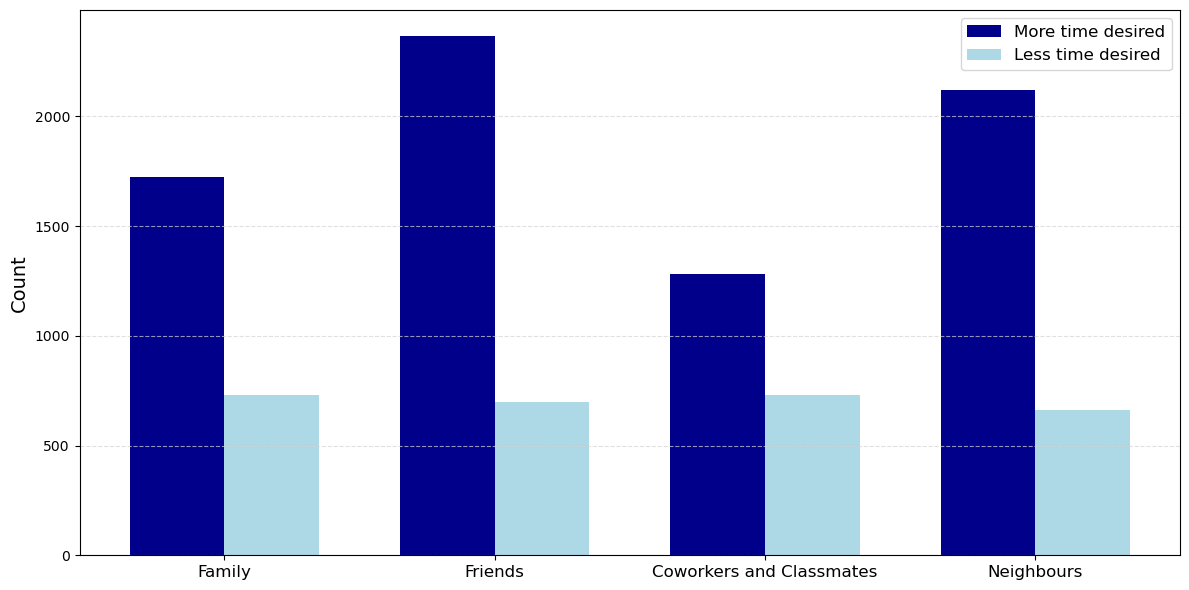

In [100]:
import matplotlib.pyplot as plt

# Prepare the data for combined plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize empty lists to hold the data for each dissatisfaction category
labels = ['Family', 'Friends', 'Coworkers and Classmates', 'Neighbours']
more_time = []
less_time = []

# Loop through each dissatisfaction column and get the counts
for dissatisfaction_col in dissatisfaction_columns:
    # Create the column name for time preference
    time_preference_col = f'{dissatisfaction_col}_time_preference'
    
    # Get the counts of "More time desired" and "Less time desired"
    time_preference_counts = df[time_preference_col].value_counts()

    # Append the counts for each category
    more_time.append(time_preference_counts.get('More time desired', 0))
    less_time.append(time_preference_counts.get('Less time desired', 0))

# Plot the data
bar_width = 0.35  # Adjust the bar width for better separation
x = range(len(dissatisfaction_columns))  # Positions for the bars

# Create the bars with colors
ax.bar(x, more_time, bar_width, color='darkblue', label='More time desired')
ax.bar([p + bar_width for p in x], less_time, bar_width, color='lightblue', label='Less time desired')

# Add labels and title
ax.set_ylabel('Count', fontsize=14)
ax.set_xticks([p + bar_width / 2 for p in x])  # Position the labels in the middle of the bars
ax.set_xticklabels(labels, rotation=0, fontsize=12)
ax.legend(loc='upper right', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


In [101]:
from scipy.stats import binom_test

# Function to perform a binomial test for more vs less time desired
def perform_proportion_test(data, category):
    more_time_count = (data == 'More time desired').sum()
    less_time_count = (data == 'Less time desired').sum()
    total_count = more_time_count + less_time_count
    
    # Perform a binomial test for whether the proportion of 'More time desired' is different from 50%
    p_value = binom_test(more_time_count, total_count, p=0.5, alternative='two-sided')
    
    return more_time_count, less_time_count, p_value

# Loop through each dissatisfaction category and perform the test
for dissatisfaction_col in dissatisfaction_columns:
    time_preference_col = f'{dissatisfaction_col}_time_preference'
    
    # Get the data for the time preference column
    time_preference_data = df[time_preference_col].dropna()
    
    # Perform the proportion test
    more_time_count, less_time_count, p_value = perform_proportion_test(time_preference_data, dissatisfaction_col)
    
    # Display the results
    print(f"Proportion Test for {dissatisfaction_col.replace('_', ' ').title()}:")
    print(f"More time desired: {more_time_count}")
    print(f"Less time desired: {less_time_count}")
    print(f"P-value for more time desired vs less time desired: {p_value}\n")


Proportion Test for Dissatisfaction Family Time:
More time desired: 1726
Less time desired: 732
P-value for more time desired vs less time desired: 8.900726047304234e-92

Proportion Test for Dissatisfaction Friends Time:
More time desired: 2367
Less time desired: 697
P-value for more time desired vs less time desired: 7.242906940337541e-211

Proportion Test for Dissatisfaction Coworkers Classmates Time:
More time desired: 1283
Less time desired: 731
P-value for more time desired vs less time desired: 4.5188511171353526e-35

Proportion Test for Dissatisfaction Neighbours Time:
More time desired: 2121
Less time desired: 661
P-value for more time desired vs less time desired: 5.0438385921626245e-177



/tmp/ipykernel_52/2969338068.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(more_time_count, total_count, p=0.5, alternative='two-sided')


Proportion Test Results:-

Family: The p-value is 8.90e-92, which is extremely small. This indicates that the difference between the number of people wanting more time and less time is highly significant.
Friends: The p-value is 7.24e-211, which is also very small, confirming a significant difference in time preferences.
Coworkers and Classmates: The p-value is 4.52e-35, again indicating a significant difference.
Neighbours: The p-value is 5.04e-177, suggesting a highly significant difference in time preferences

Proportion Test Interpretation:
For all four categories (family, friends, coworkers/classmates, and neighbours), the null hypothesis (that the proportion of people wanting more time is equal to those wanting less time) is rejected.
This means that people who are dissatisfied with their social time are significantly more likely to want more time with others in all categories, with the friends and neighbours categories showing the most pronounced difference.

The results strongly suggest that there is a gap between the social time people currently have and the social time they desire, especially for family and friends.
This finding could be useful for interventions aimed at addressing dissatisfaction in these areas (e.g., hospitals, community programs, etc.), as it shows a clear preference for more social time.